In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Problem

Suppose we had a model, $y = x^2$, and this model was too complex for us to compute direct solutions to. That is, given **any** $x$, we are unable to directly compute the corresponding $y$. This is the general situation we find ourselves in with CGE model.

But imagine that we know the solution to the function at single point, $x_0$. This is what model calibration gives us. We want to begin the model at $x_0$, then compute the value of the model after a shock, at $x + dx$. This is the idea of a policy experiment.

In [4]:
x, x0, dx = sp.symbols('x x_0 dx', real=True, positive=True)
eq = x ** 2
J = eq.diff(x)

linear_eq = 2 * (x - x0) * x0 + x0 ** 2
f = sp.lambdify([x, x0], linear_eq)

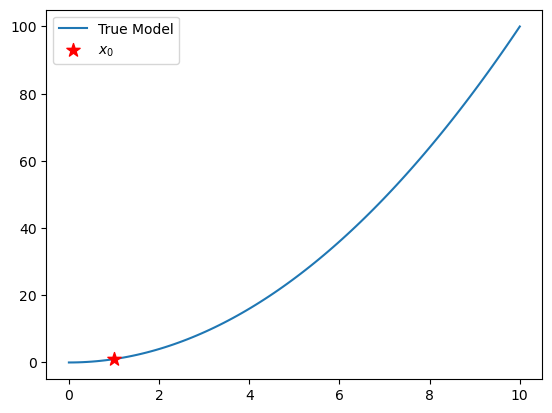

In [12]:
fig, ax = plt.subplots()
x_grid = np.linspace(0, 10, 100)
ax.plot(x_grid, x_grid ** 2, label = 'True Model')
ax.scatter(1, 1, marker='*', label=r'$x_0$', color='red', s=100, zorder=10)
ax.legend()
plt.show()

Linearzation is the go-to technique for this situation. If we can't solve the problem, we replace it with a simpler one. We can compute the slope $\frac{\partial y}{\partial x}$ at the point $x_0$, and use the resulting line as an approximate model.

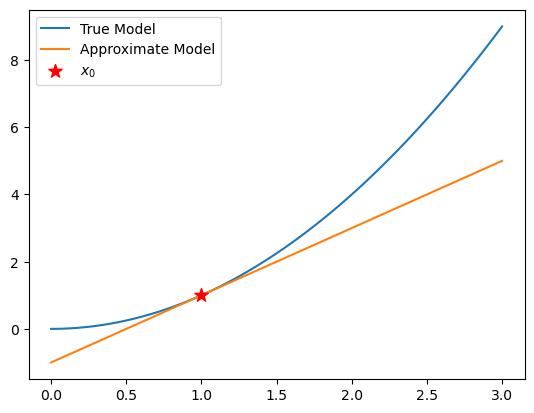

In [13]:
fig, ax = plt.subplots()
x_grid = np.linspace(0, 3, 100)
ax.plot(x_grid, x_grid ** 2, label = 'True Model')
ax.plot(x_grid, f(x_grid, 1), label = 'Approximate Model')
ax.scatter(1, 1, marker='*', label=r'$x_0$', color='red', s=100, zorder=10)
ax.legend()
plt.show()

Notice how that if the policy experiment, $dx$ is quite small, then the approximate model will be quite good. Here, even after a 25% increase, the error in the approximation isn't so huge.

Percetage Error: 4.17%


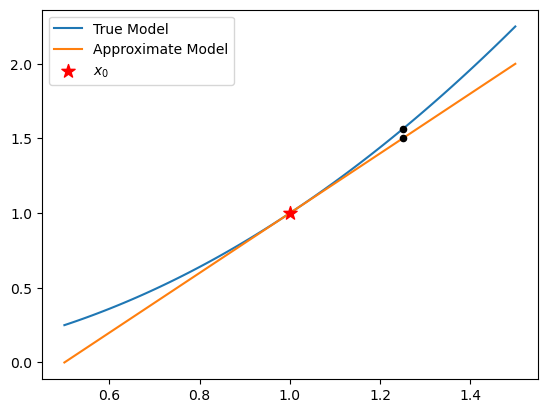

In [40]:
fig, ax = plt.subplots()
x_grid = np.linspace(0.5, 1.5, 100)
x0 = 1
dx = 0.25

ax.plot(x_grid, x_grid ** 2, label = 'True Model')
ax.plot(x_grid, f(x_grid, x0), label = 'Approximate Model')
ax.scatter(x0, x0 ** 2, marker='*', label=r'$x_0$', color='red', s=100, zorder=10)

y_true, y_approx = (x0 + dx) ** 2, f(x0 + dx, x0)
ax.scatter([x0 + dx, x0 + dx], [y_true, y_approx], s=20, c='k', zorder=20)
ax.legend()

print(f'Percetage Error: {(y_true - y_approx) / y_approx:0.2%}')
plt.show()

For large policy experiments, of course, the error is only going to grow. Note also that the notion of a "small experiment" is relative to the amount of curvature in the underlying model. Here we don't have so much, so the we can go out to 25%. We can also imagine a model where even 5% would be too far away. 

Percetage Error: 326.67%


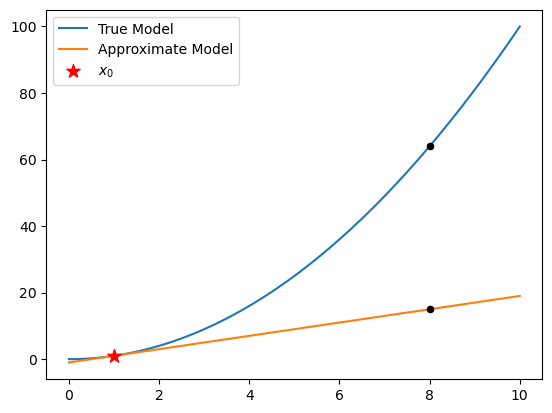

In [41]:
fig, ax = plt.subplots()
x_grid = np.linspace(0, 10, 100)
x0 = 1
dx = 7

ax.plot(x_grid, x_grid ** 2, label = 'True Model')
ax.plot(x_grid, f(x_grid, x0), label = 'Approximate Model')
ax.scatter(x0, x0 ** 2, marker='*', label=r'$x_0$', color='red', s=100, zorder=10)

y_true, y_approx = (x0 + dx) ** 2, f(x0 + dx, x0)
ax.scatter([x0 + dx, x0 + dx], [y_true, y_approx], s=20, c='k', zorder=20)
ax.legend()

print(f'Percetage Error: {(y_true - y_approx) / y_approx:0.2%}')
plt.show()

## Euler Approximation

Without any new tools, it is possible to do better. Instead of making a single approximation of a single shock, we can instead divide the shock into a sequence of smaller shocks. We apply one shock, then update the slope of the model to that of the new position.

Basically, instead of "driving" stright to the experiment, we stop along the way and ask for directions. We still drive only in straight lines, but the directions we get on the way will put the final shock much closer to the true value. 

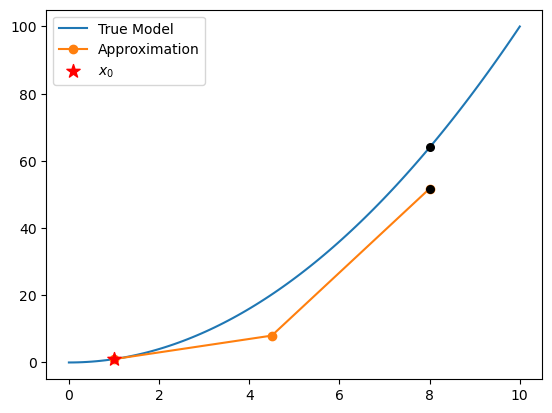

In [38]:
x0 = 1
dx = 7

x_final = x0 + dx
n_steps = 2
step_size = (x_final - x0) / n_steps if n_steps > 0 else x_final

xs = np.zeros(n_steps + 1)
ys = np.zeros(n_steps + 1)
xs[0] = x0
ys[0] = 1

for t in range(1, n_steps + 1):
    xs[t] = xs[t-1] + step_size
    ys[t] = f(xs[t], xs[t-1])


fig, ax = plt.subplots()
x_grid = np.linspace(0, 10, 100)

ax.plot(x_grid, x_grid ** 2, label = 'True Model')
ax.plot(xs, ys, marker='o', label='Approximation')
ax.scatter(x0, x0 ** 2, marker='*', label=r'$x_0$', color='red', s=100, zorder=10)

y_true, y_approx = (x0 + dx) ** 2, ys[-1]
ax.scatter([x0 + dx, x0 + dx], [y_true, y_approx], s=30, c='k', zorder=100)
ax.legend()
plt.show()

You can see that after just one update step, the approximation has gotten significantly better. Of course, nothing stops us from making an arbitrary number of update steps. 

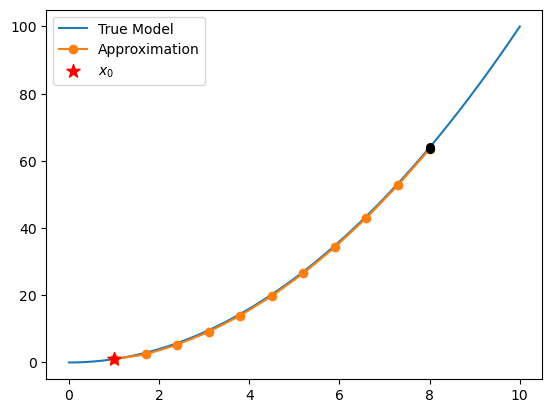

In [39]:
x0 = 1
dx = 7

x_final = x0 + dx
n_steps = 10
step_size = (x_final - x0) / n_steps if n_steps > 0 else x_final

xs = np.zeros(n_steps + 1)
ys = np.zeros(n_steps + 1)
xs[0] = x0
ys[0] = 1

for t in range(1, n_steps + 1):
    xs[t] = xs[t-1] + step_size
    ys[t] = f(xs[t], xs[t-1])


fig, ax = plt.subplots()
x_grid = np.linspace(0, 10, 100)

ax.plot(x_grid, x_grid ** 2, label = 'True Model')
ax.plot(xs, ys, marker='o', label='Approximation')
ax.scatter(x0, x0 ** 2, marker='*', label=r'$x_0$', color='red', s=100, zorder=10)

y_true, y_approx = (x0 + dx) ** 2, ys[-1]
ax.scatter([x0 + dx, x0 + dx], [y_true, y_approx], s=30, c='k', zorder=100)
ax.legend()
plt.show()